# Student Performance Prediction
Dataset is taken from <a href="https://archive.ics.uci.edu/ml/datasets/Student+Performance">here</a>

In [252]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
import matplotlib
from sklearn.metrics import f1_score

In [253]:
d1 = pd.read_csv('./student-mat1.csv')
d2 = pd.read_csv("./student-por1.csv")

In [254]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [255]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [256]:
# d2.drop(['G1','G2'],axis=1,inplace=True)
for i in range(len(d2)):
#     print(df.iloc[2]['G3'])
    
    if d2['G3'].iloc[i] > 9:
        d2['G3'].iloc[i] = "yes"
    else:
        d2['G3'].iloc[i] = "no"
        
# d1.drop(['G1','G2'],axis=1,inplace=True)
for i in range(len(d1)):
    
    if d1['G3'].iloc[i] > 9:
        d1['G3'].iloc[i] = "yes"
    else:
        d1['G3'].iloc[i] = "no"

In [257]:
d1.rename(index=str,columns={'G3':'passed'},inplace=True)
d2.rename(index=str,columns={'G3':'passed'},inplace=True)
print(len(d1))
print(len(d2))

395
649


In [155]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [14]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,yes
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,yes


In [258]:
student_data = pd.concat([d1,d2])
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,yes


In [16]:
len(student_data)

1044

In [17]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000


# Count Null values

In [18]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int6

In [19]:
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
passed        0
dtype: int64

In [20]:
student_data['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

In [21]:
student_data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

# Count histogram

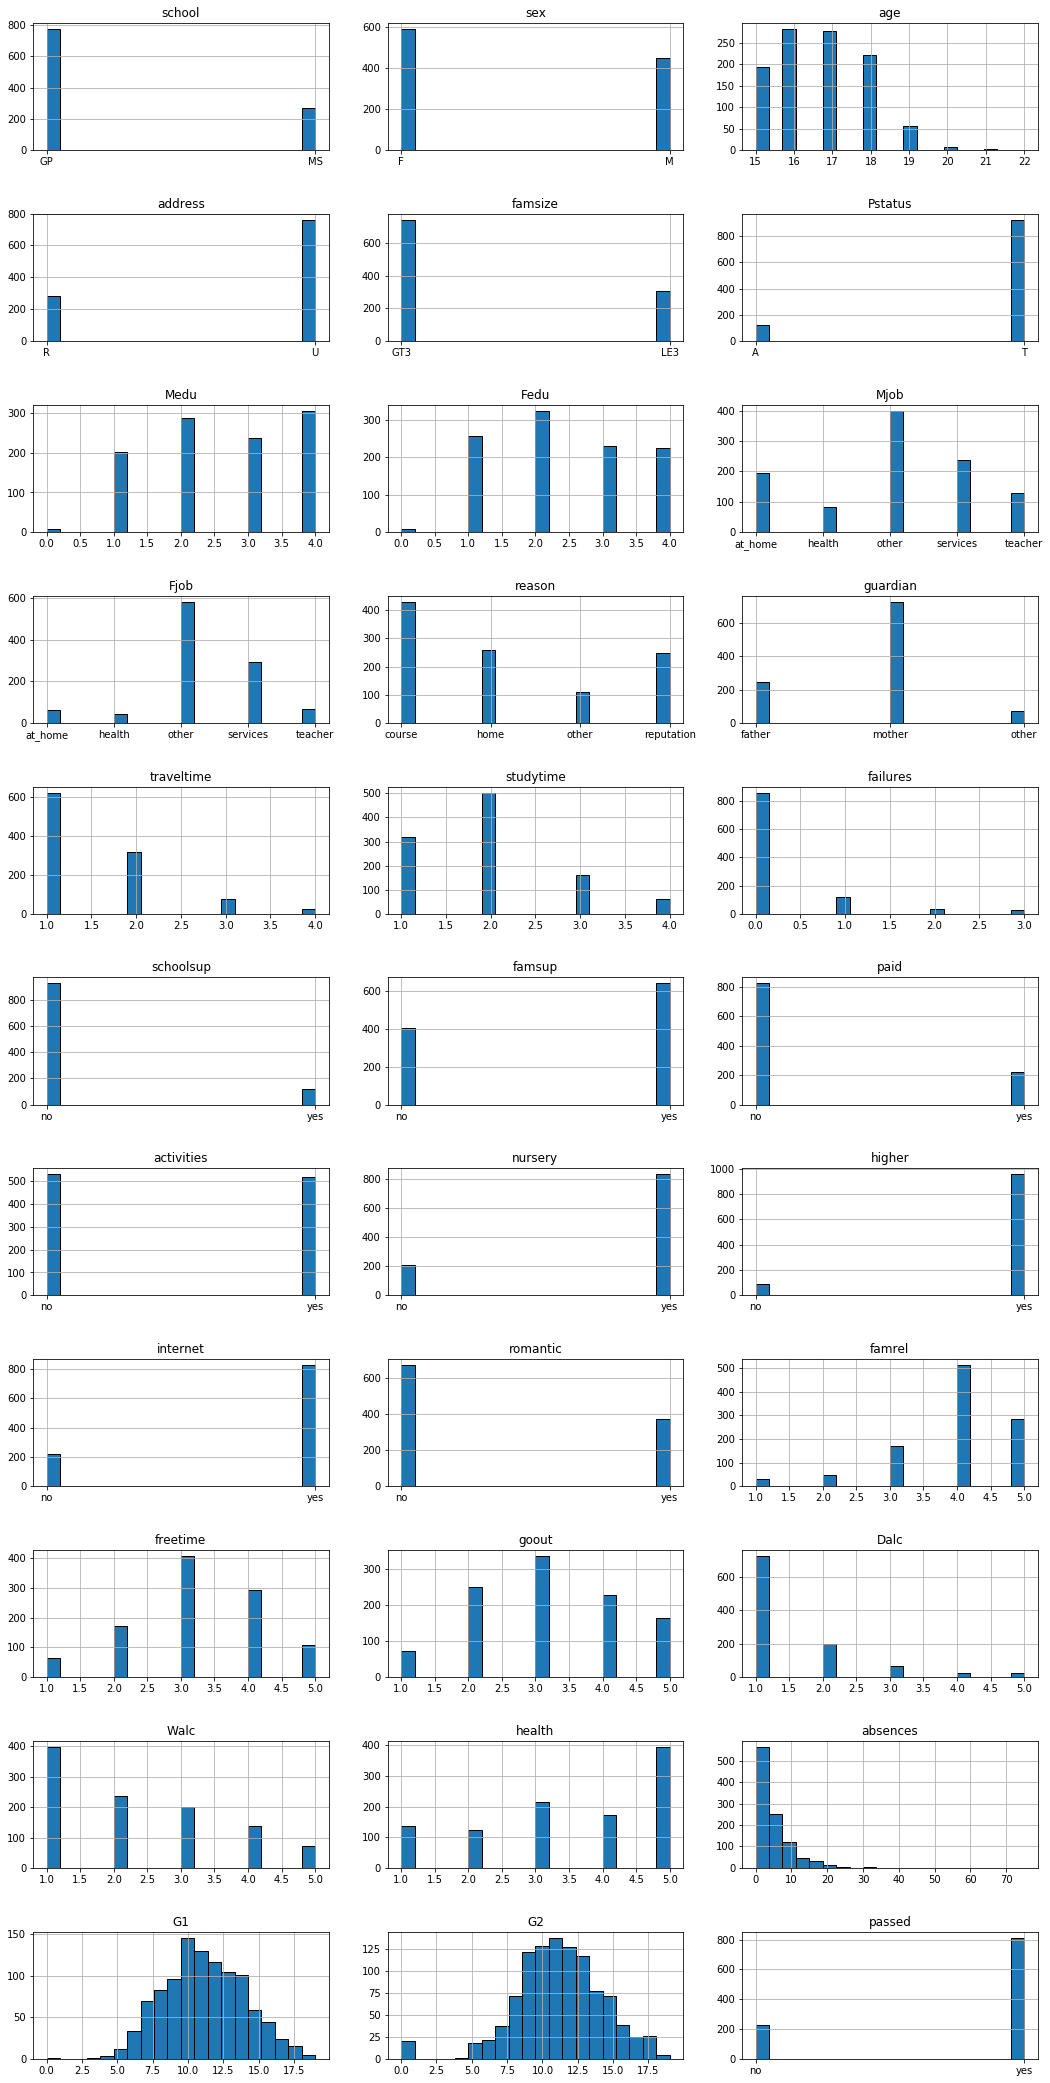

In [22]:
columns=student_data.columns[:]
plt.subplots(figsize=(18,55))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    student_data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Relation of each column with every other column

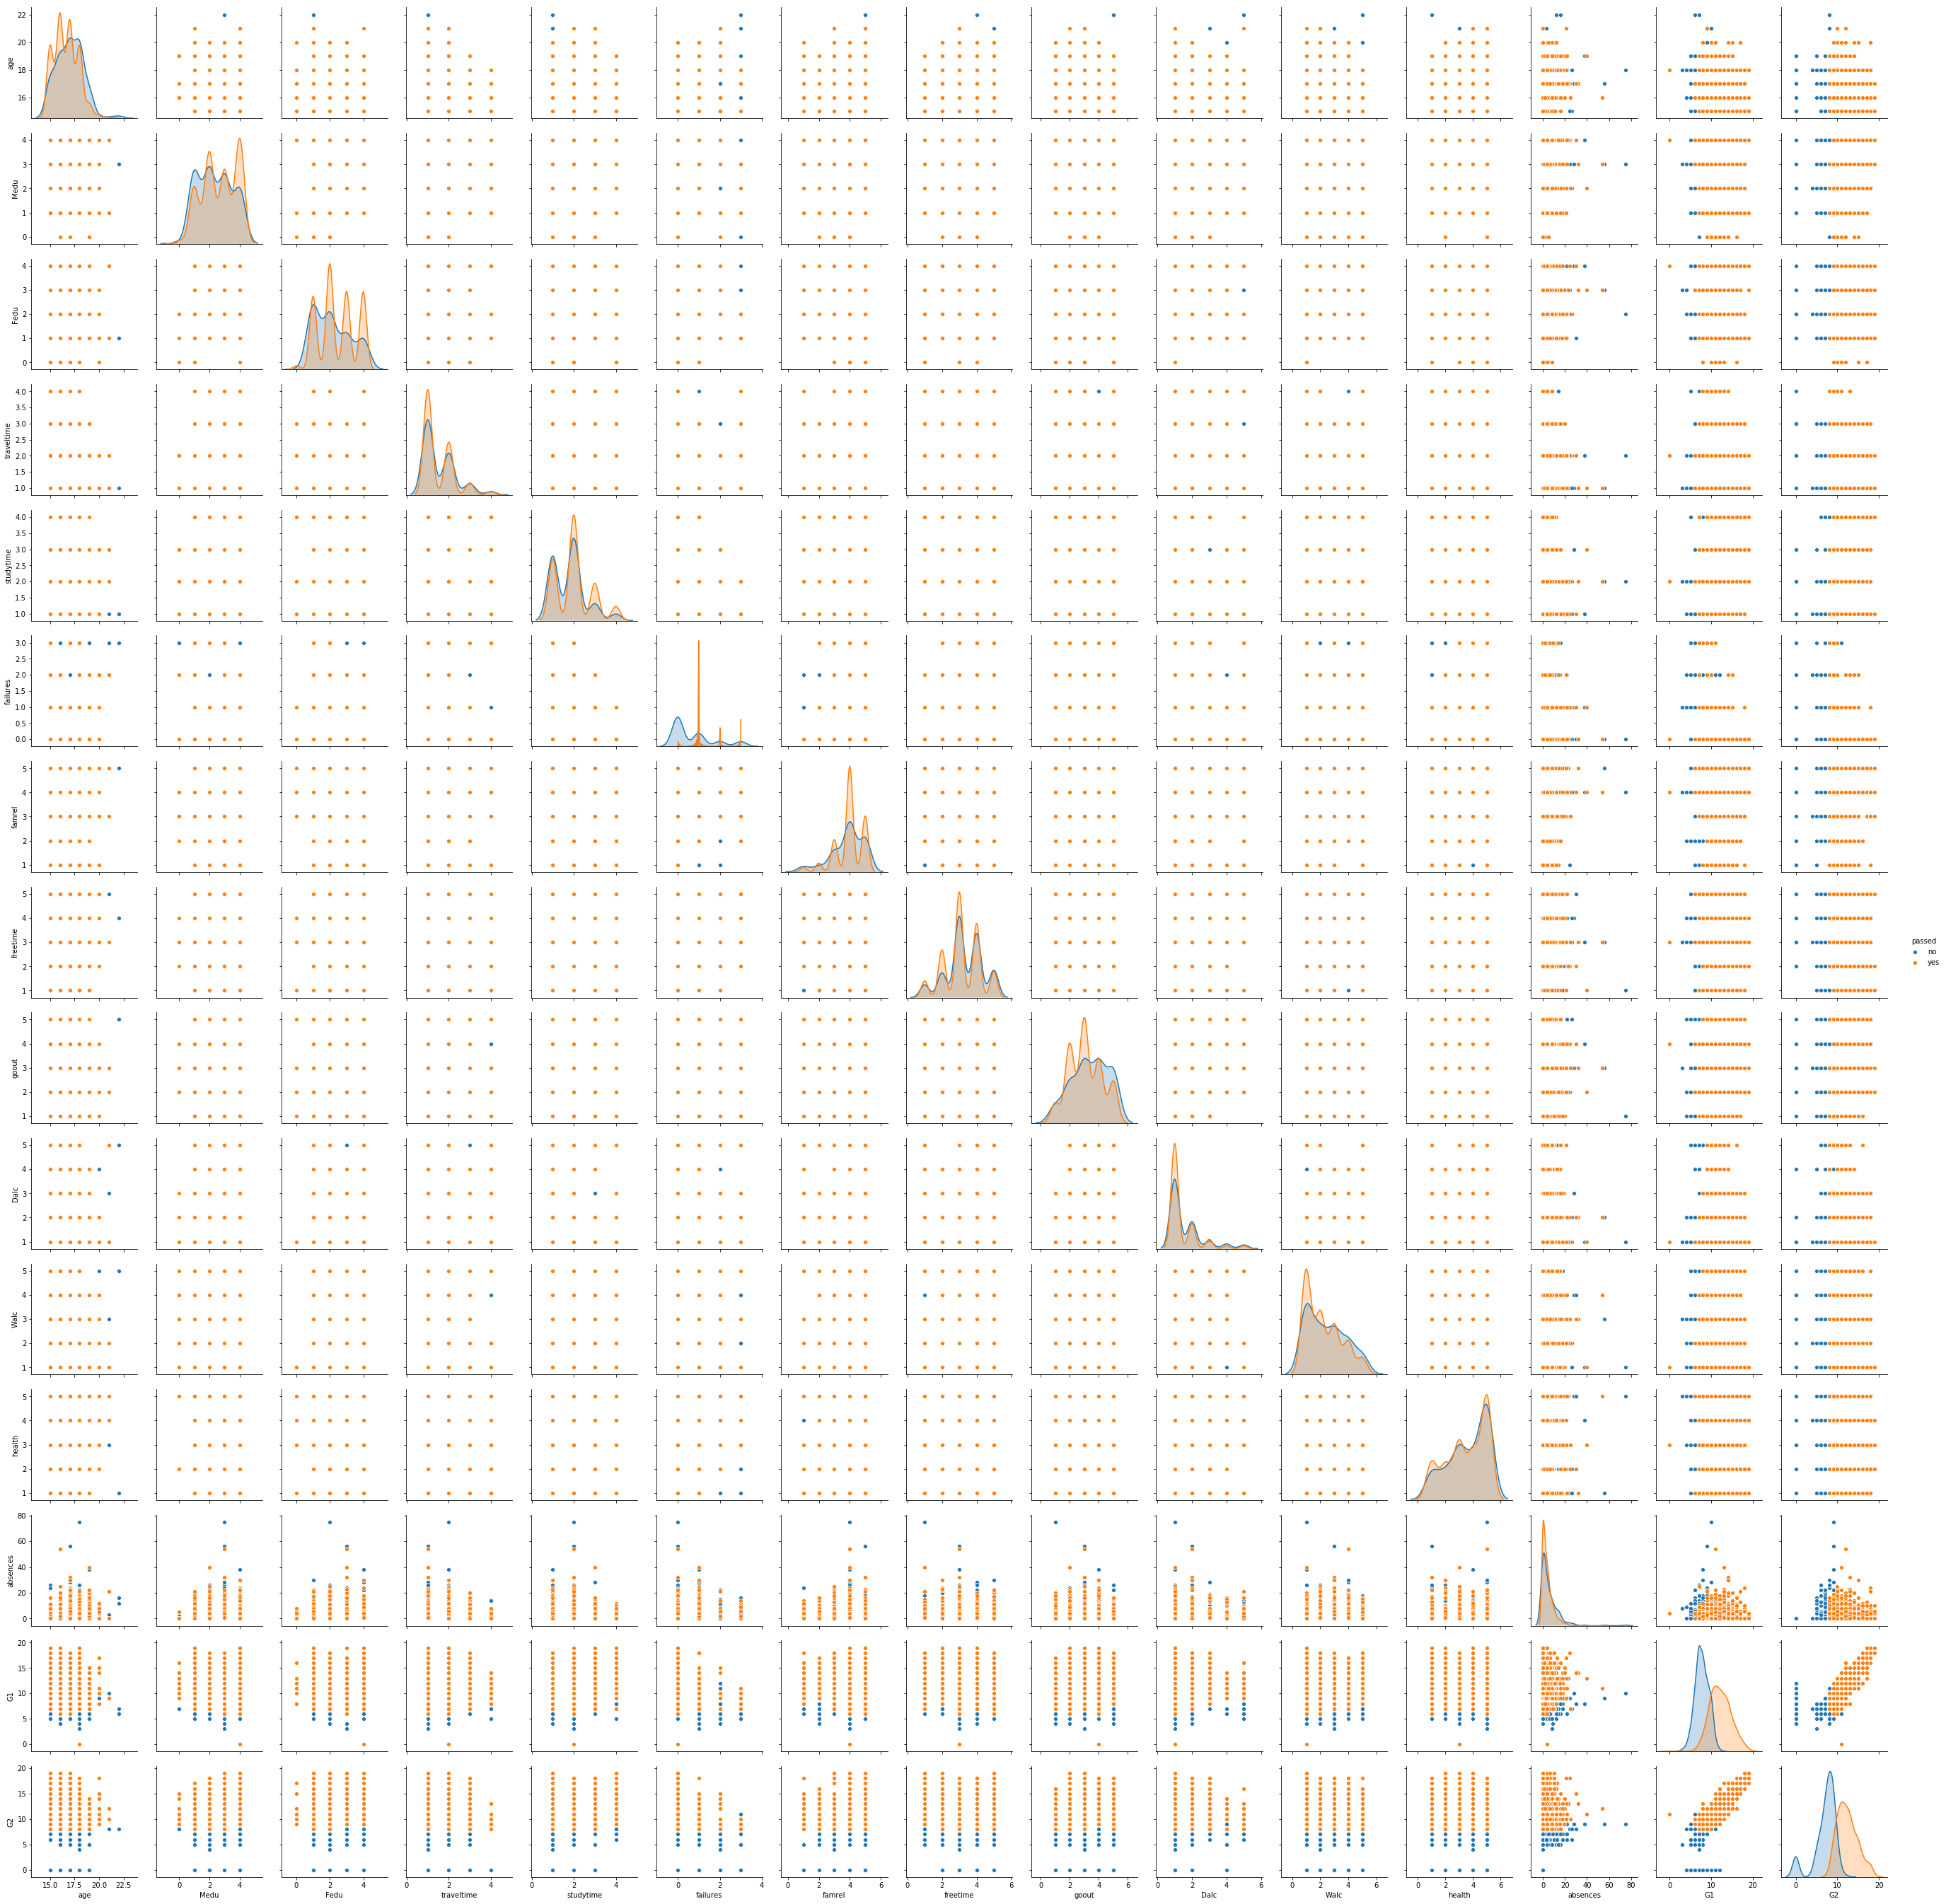

In [23]:
sns.pairplot(data=student_data,hue='passed',diag_kind='kde')
plt.show()

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

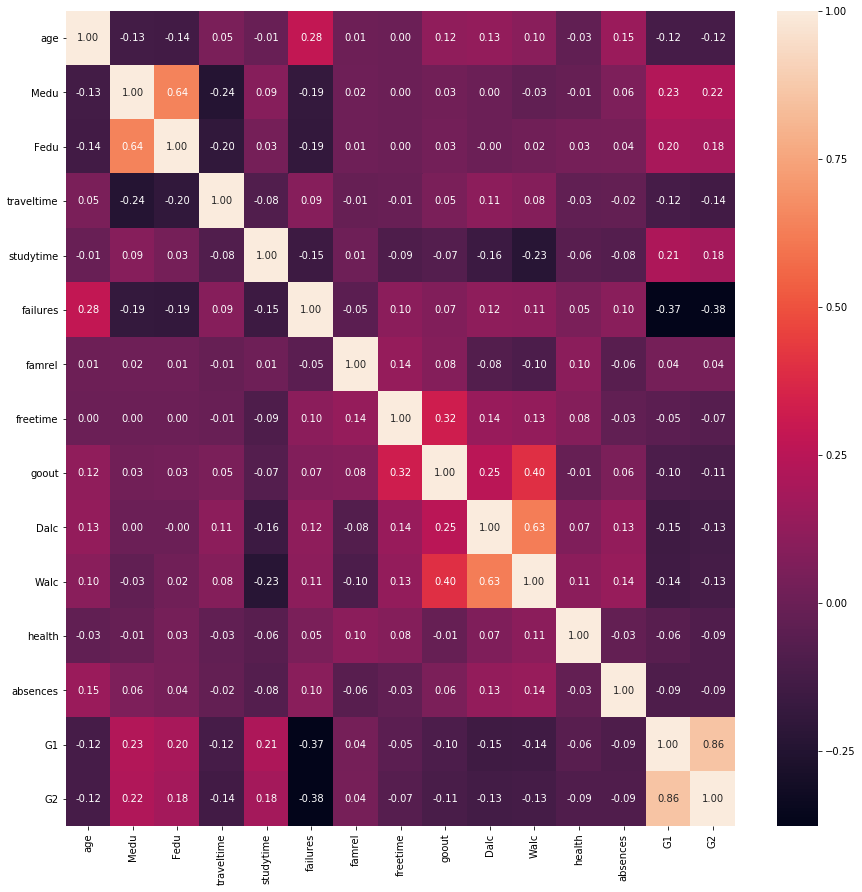

In [24]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(student_data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

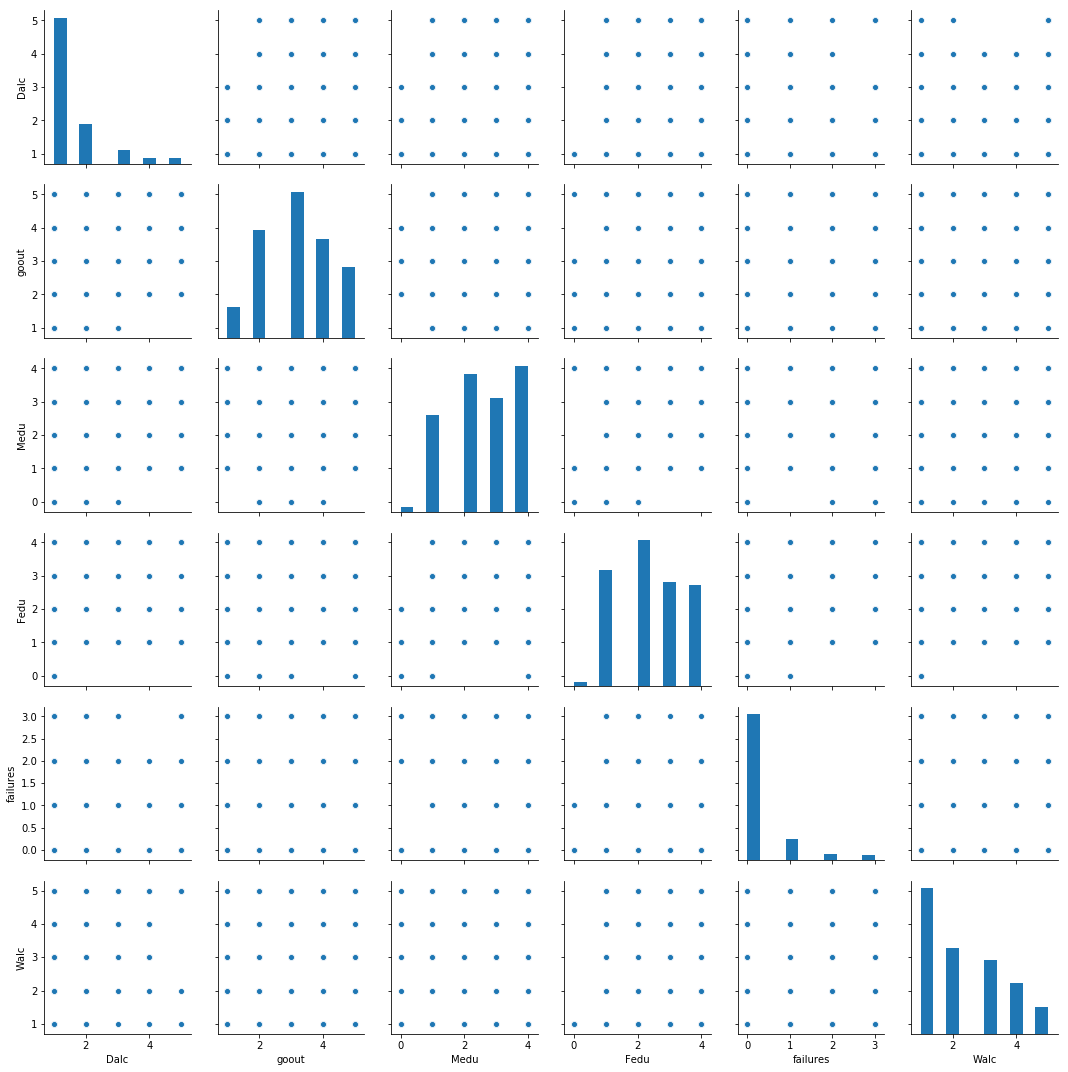

In [25]:
df_small = student_data[[ 
               'passed',
               'Dalc', 
               'goout',
               'Medu',
               'Fedu','failures','Walc']]
sns.pairplot(df_small)

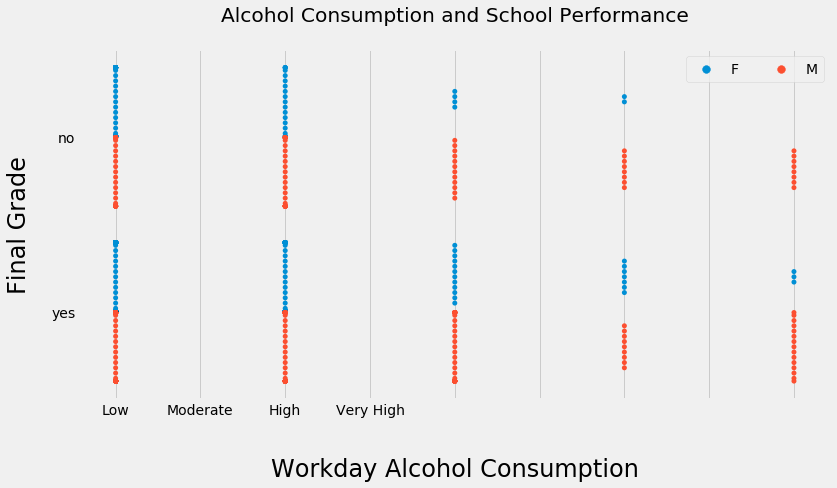

In [26]:
matplotlib.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Dalc',y='passed',hue='sex', data=student_data,dodge=True)
ax.set_xlabel("Workday Alcohol Consumption", fontsize=24, labelpad = 40)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.show()

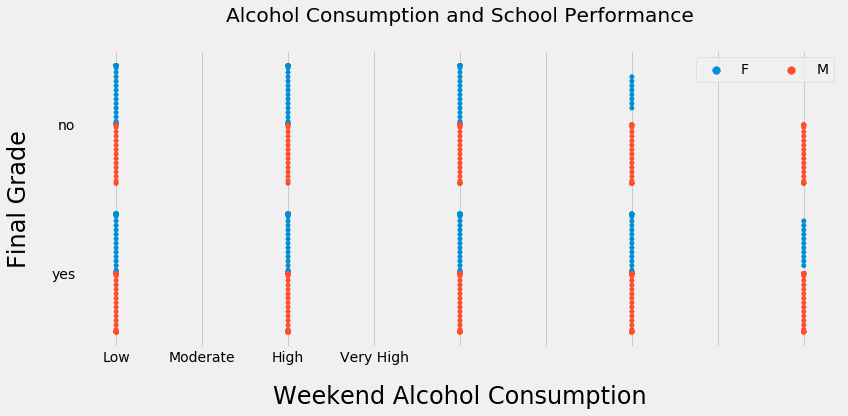

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Walc',y='passed',hue='sex', data=student_data,dodge=True)
ax.set_xlabel("Weekend Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()

In [34]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [259]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [260]:
n_students = len(student_data.index)

# Calculate number of features, excluding the label column
n_features = len(student_data.columns) - 1

# Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# Calculate failing students.  
n_failed = len(student_data[student_data['passed'] == 'no'])

# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))

Total number of students: 1044
Number of features: 32
Number of students who passed: 814
Number of students who failed: 230


In [261]:
# feature_cols = list()

# # Extract target column 'passed'
# target_col = student_data.columns[-1] 


# # Separate the data into feature data and target data (X_all and y_all, respectively)
# X_all = student_data[student_data.columns[:-1]]
# y_all = student_data[student_data.columns[-1]]

# X_all.head()

In [262]:
len(X_all)

1044

In [263]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [264]:

obj_df = student_data.select_dtypes(include=['object']).copy()
obj_df.drop(['passed'],axis=1,inplace=True)
lb = LabelEncoder()
for i in obj_df.columns:
    obj_df[i] = lb.fit_transform(obj_df[i])
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [265]:
flt_df = student_data.select_dtypes(include=['int','float']).copy()
flt_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10


In [266]:
on = OneHotEncoder()
obj_df = on.fit_transform(obj_df).toarray()
obj_df.shape

(1044, 43)

In [267]:
flt_arr = np.array(flt_df)

In [268]:
flt_arr.shape

(1044, 15)

In [269]:
lb = LabelEncoder()
student_data['passed'] = lb.fit_transform(student_data['passed'])

In [270]:
X = np.concatenate((flt_arr,obj_df),axis=1)
y = np.array([student_data['passed']]).T
print(y.shape)
print(X.shape)

(1044, 1)
(1044, 58)


In [271]:
lb = LabelEncoder()
student_data['passed'] = lb.fit_transform(student_data['passed'])

In [272]:
y

array([[0],
       [0],
       [1],
       ..., 
       [0],
       [1],
       [1]])

In [273]:
from sklearn.cross_validation import train_test_split

# Set the number of training points

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2,stratify=y_all)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 783 samples.
Testing set has 261 samples.


In [274]:
from sklearn.svm import SVC
sv = SVC().fit(X_train,y_train)

In [275]:
y_pred = sv.predict(X_train)
f1_score(y_train, y_pred, pos_label=1)

0.97184231697506029

In [276]:
y_pred = sv.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.93203883495145623

In [277]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [278]:
gb = GaussianNB()

In [279]:
gb = GaussianNB().fit(X_train,y_train)

In [280]:
y_pred = gb.predict(X_train)
f1_score(y_train, y_pred, pos_label=1)

0.90344248530646509

In [281]:
y_pred = gb.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.87

In [282]:
dt = DecisionTreeClassifier().fit(X_train,y_train)

In [283]:
y_pred = dt.predict(X_train)
f1_score(y_train, y_pred, pos_label=1)

1.0

In [284]:
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.92839506172839503

In [285]:
lr = LogisticRegression().fit(X_train,y_train)

In [286]:
y_pred = lr.predict(X_train)
f1_score(y_train, y_pred, pos_label=1)

0.95948136142625617

In [287]:
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.94527363184079605

In [288]:
rm = RandomForestClassifier(n_estimators=50).fit(X_train,y_train)

In [289]:
y_pred = rm.predict(X_train)
f1_score(y_train, y_pred, pos_label=1)

1.0

In [290]:
y_pred = rm.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.93887530562347188

In [291]:
import pickle as pk

In [292]:
pk.dump(sv,open('Support Vector Classifier with G1 and G2','wb'))
pk.dump(rm,open('Random Forest classifier with G1 and G2','wb'))
pk.dump(dt,open('Decision Tree Classifier with G1 and G2','wb'))
pk.dump(gb,open('Naive Bayes with G1 and G2','wb'))

In [129]:
data = np.array(df)
data.shape

(395, 32)

In [175]:
print("F1 score of Random Forest on test set: {}".format(f1_score(y_test, y_pred, pos_label=1)))

F1 score of Random Forest on test set: 0.8801742919389979


In [137]:
for i in range(len(df.columns)):
     if l[i] == ('O'):
            lr = LabelEncoder()
            data[:,i] = lr.fit_transform(data[:,i])

IndexError: too many indices for array

In [176]:
print("Shape of y: ",y.shape)

Shape of y:  (1044, 1)


In [216]:
obj_df = df.select_dtypes(include=['object']).copy()
lb = LabelEncoder()
for i in obj_df.columns:
    obj_df[i] = lb.fit_transform(obj_df[i])
obj_df.head()

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [217]:
flt_df = df.select_dtypes(include=['int','float']).copy()
flt_df.drop(['G3'],axis=1,inplace=True)

In [218]:
on = OneHotEncoder()
obj_df = on.fit_transform(obj_df).toarray()
obj_df.shape

(395, 41)

In [219]:
flt_arr = np.array(flt_df)

In [220]:
flt_arr.shape

(395, 15)

In [221]:
X = np.concatenate((flt_arr,obj_df),axis=1)
y = np.array([df['G3']]).T
print(y.shape)
print(X.shape)

(395, 1)
(395, 56)


In [164]:
X[:5]

array([[ 18.,   4.,   4.,   2.,   2.,   0.,   4.,   3.,   4.,   1.,   1.,
          3.,   6.,   5.,   6.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,
          0.],
       [ 17.,   1.,   1.,   1.,   2.,   0.,   5.,   3.,   3.,   1.,   1.,
          3.,   4.,   5.,   5.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
          0.],
       [ 15.,   1.,   1.,   1.,   2.,   3.,   4.,   3.,   2.,   2.,   3.,
          3.,  10.,   7.,   8.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
        

In [222]:
obj_df

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  1.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  1.,  0.],
       [ 0.,  1.,  1., ...,  1.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.]])

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F  

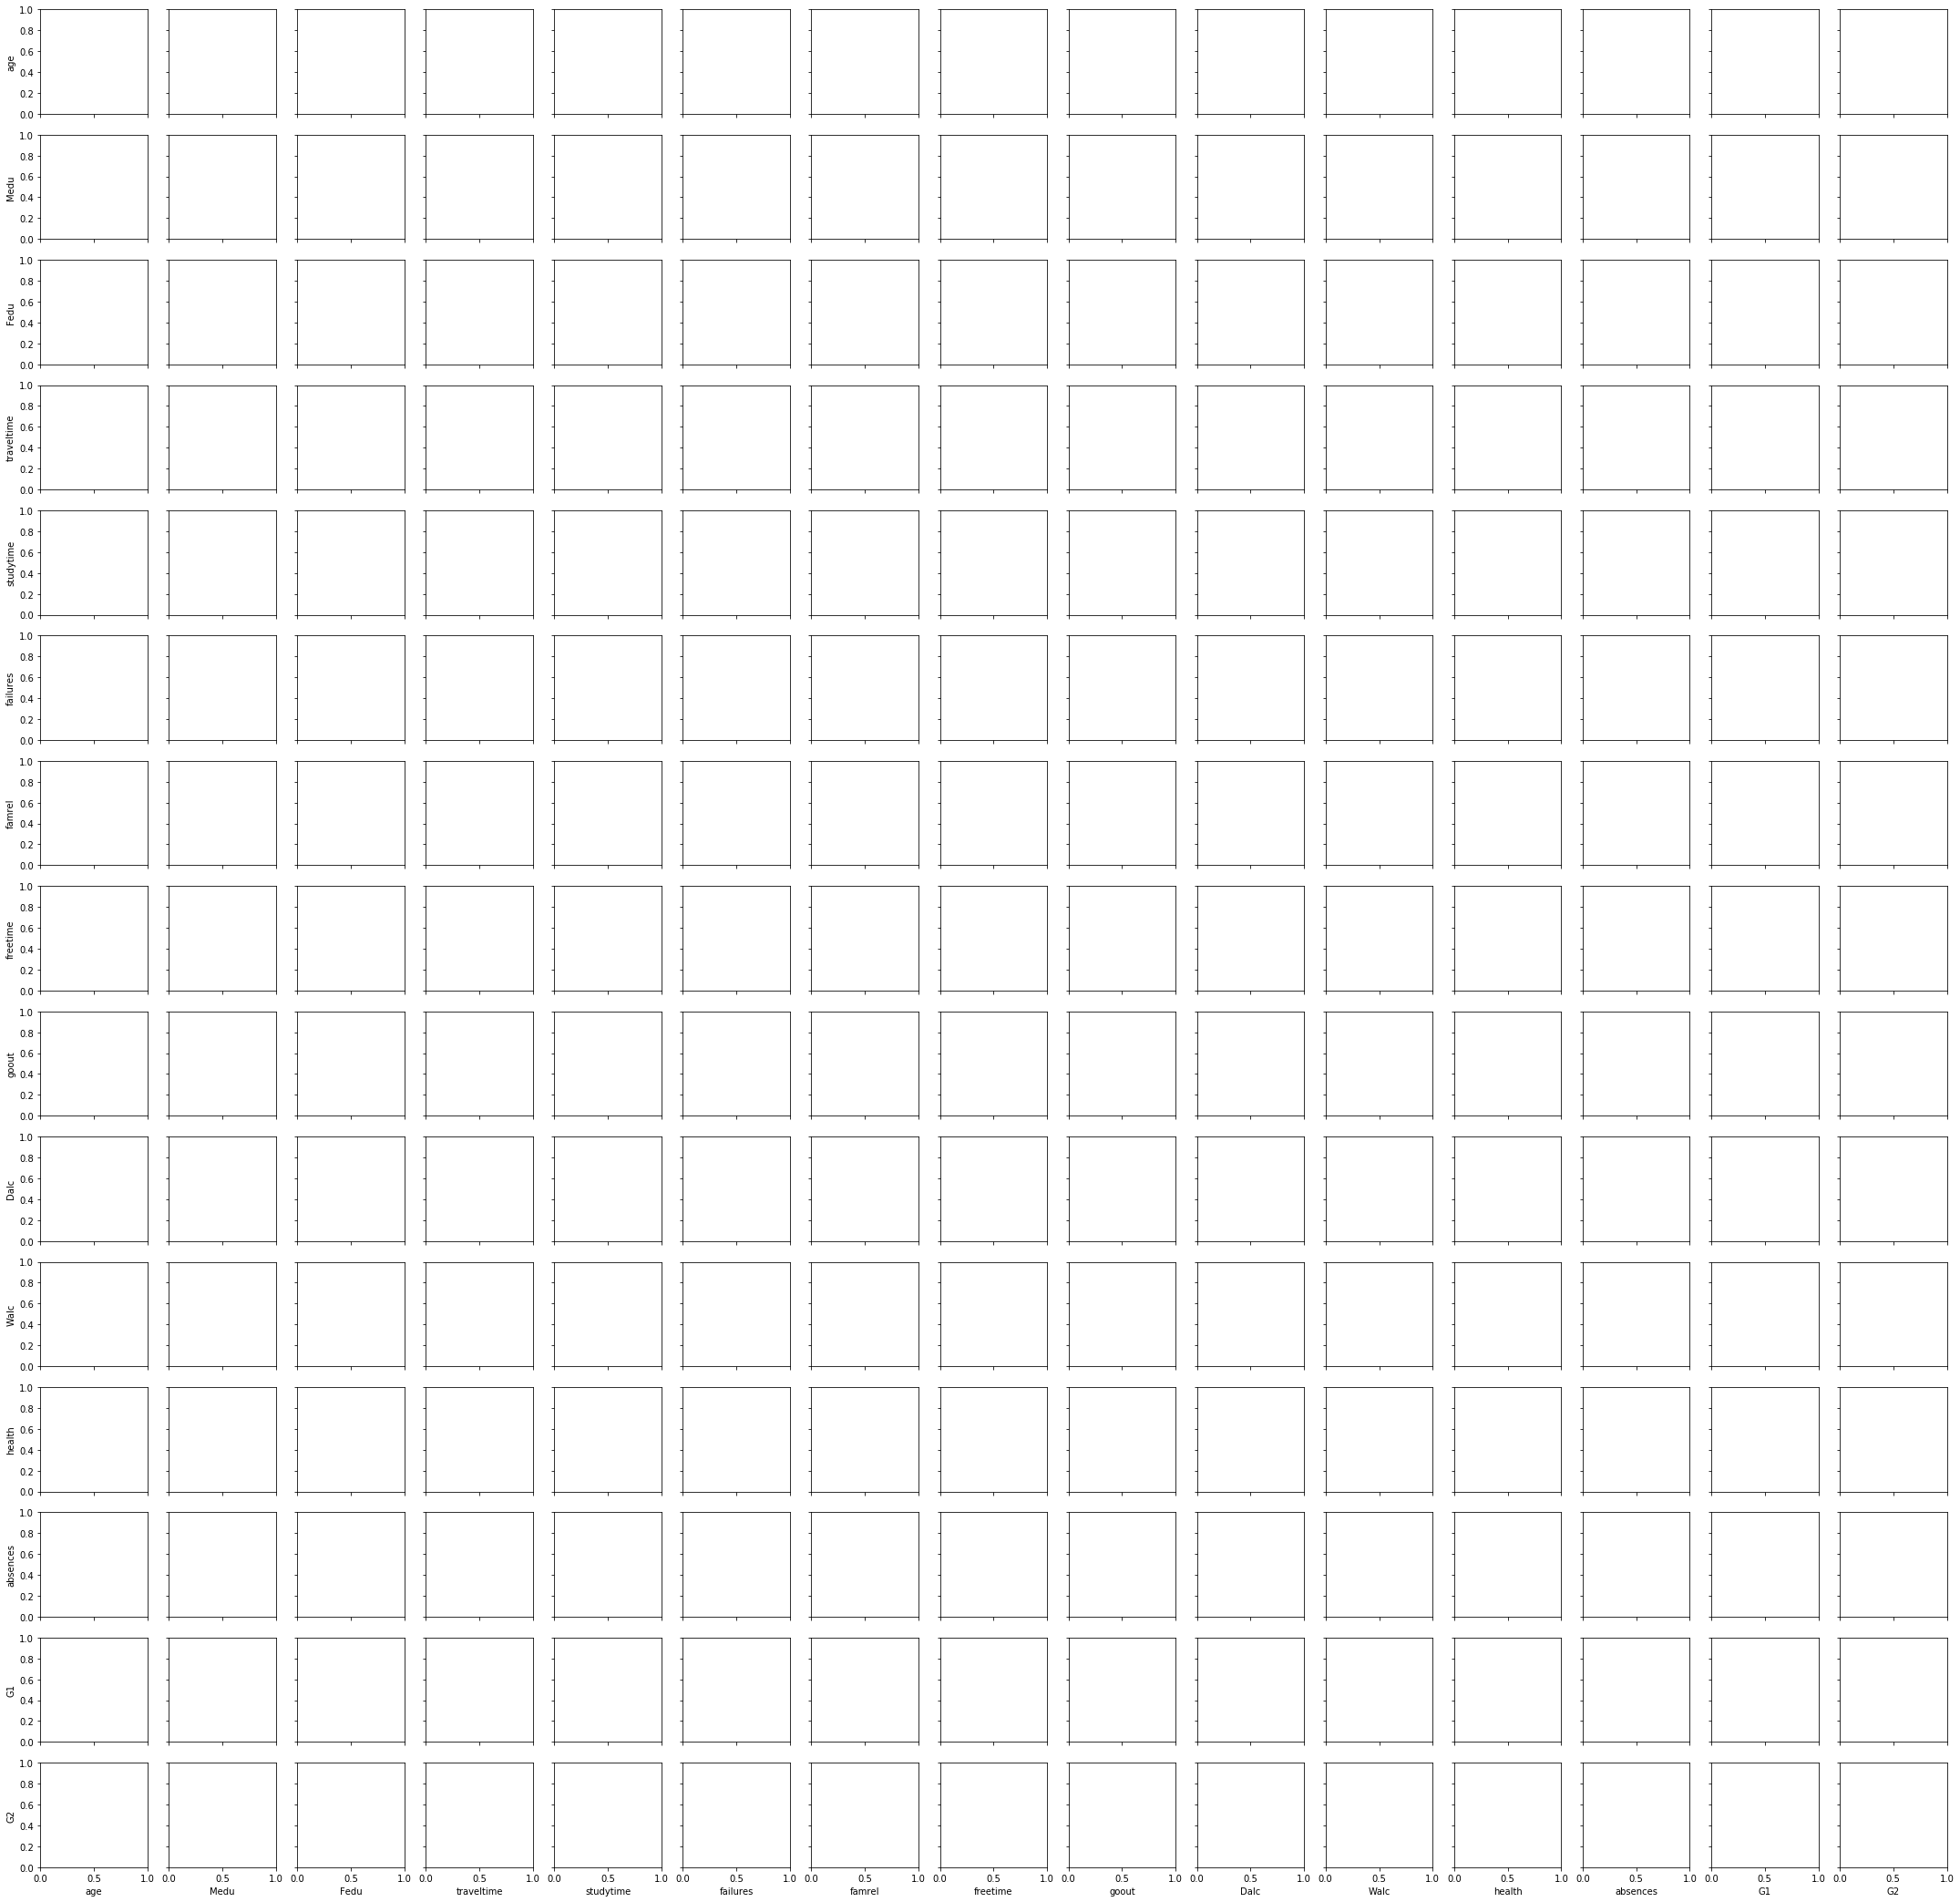

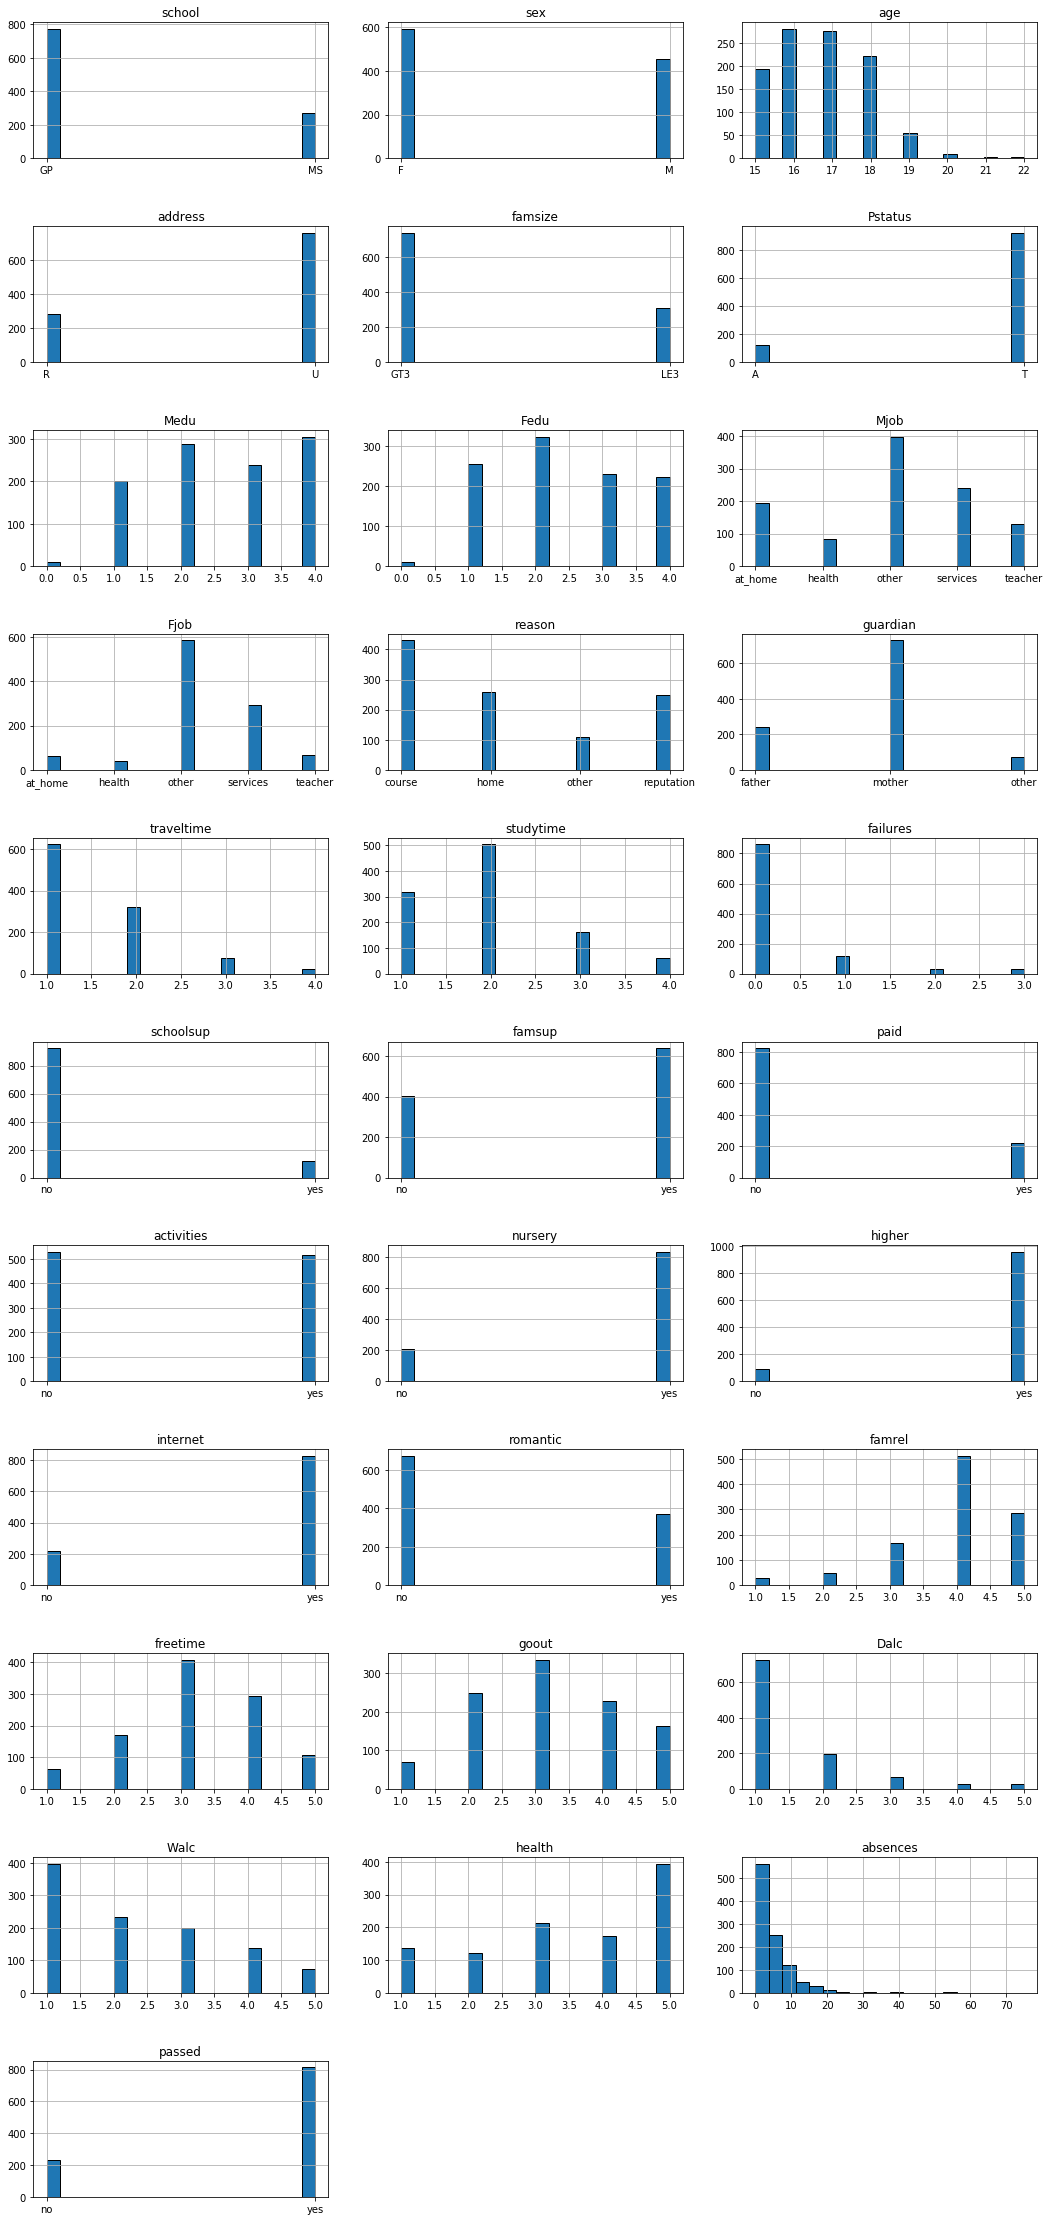

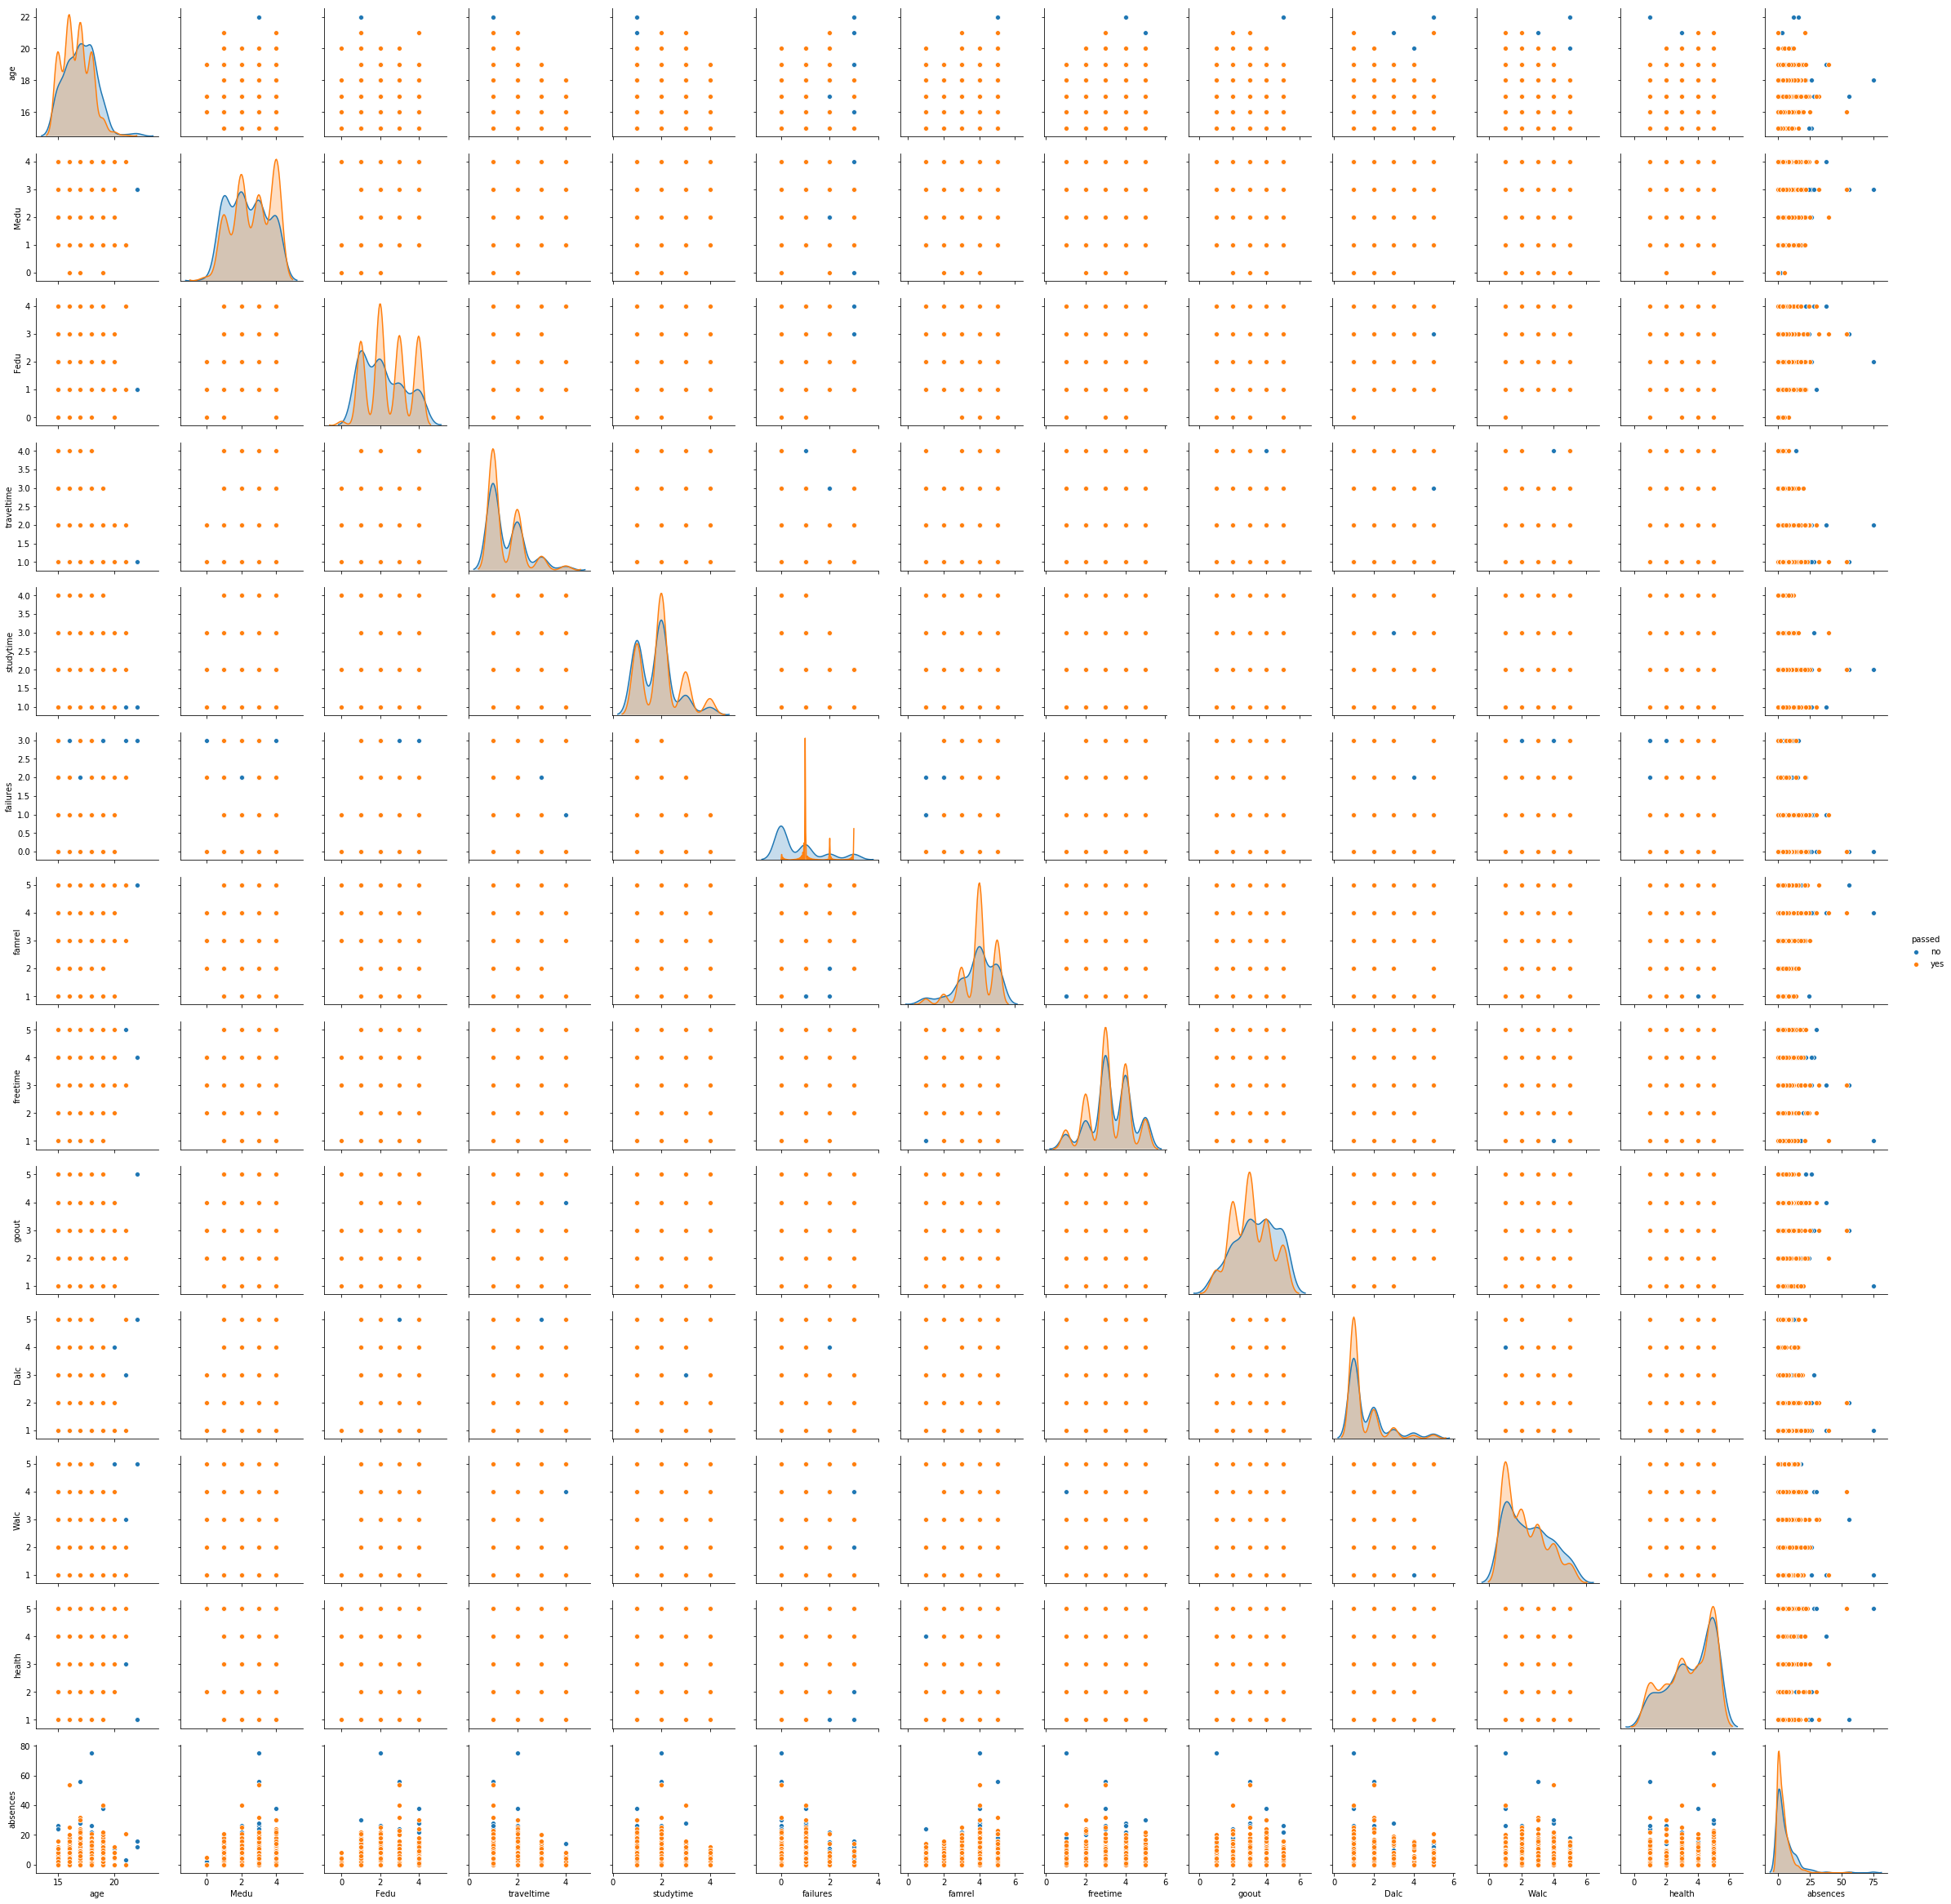

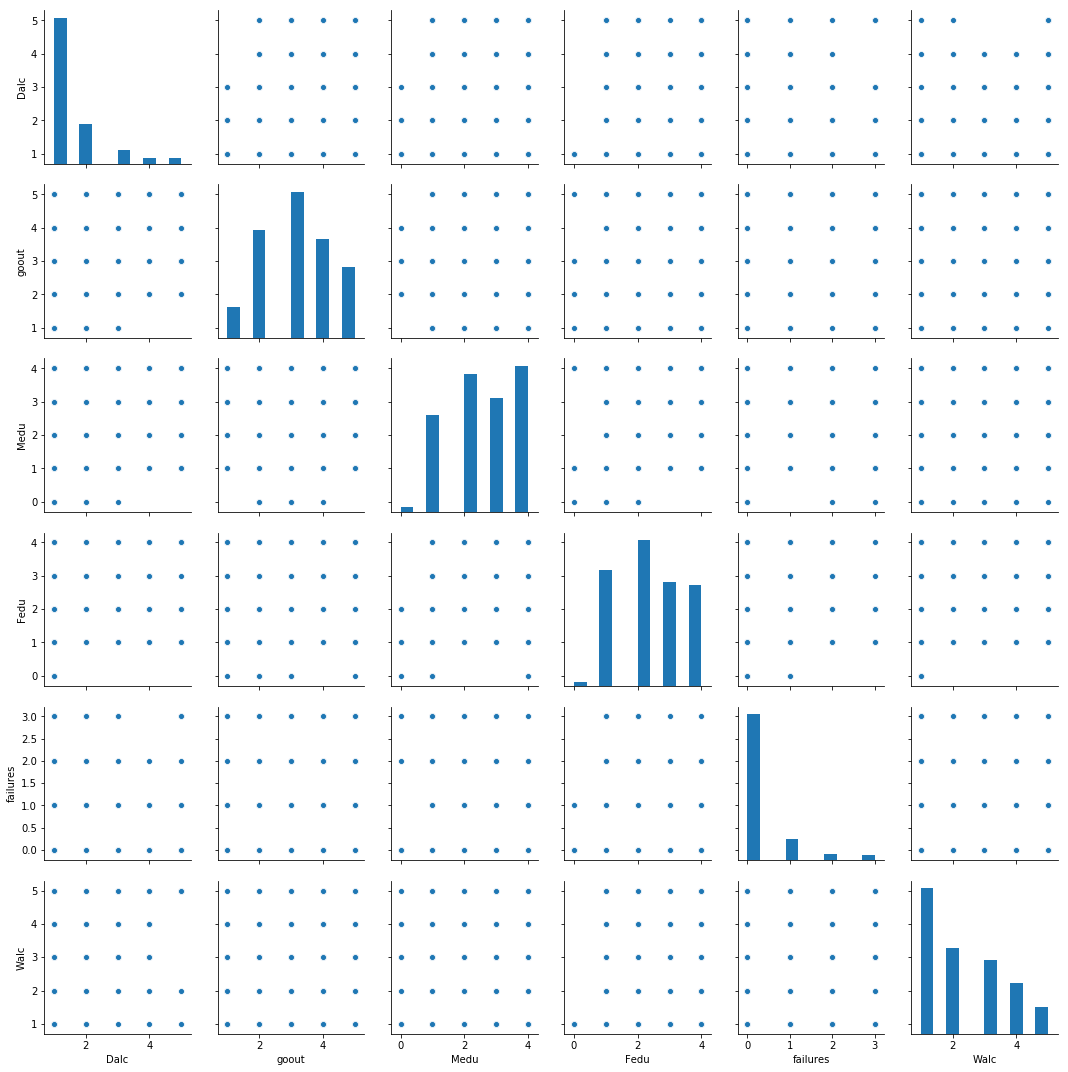

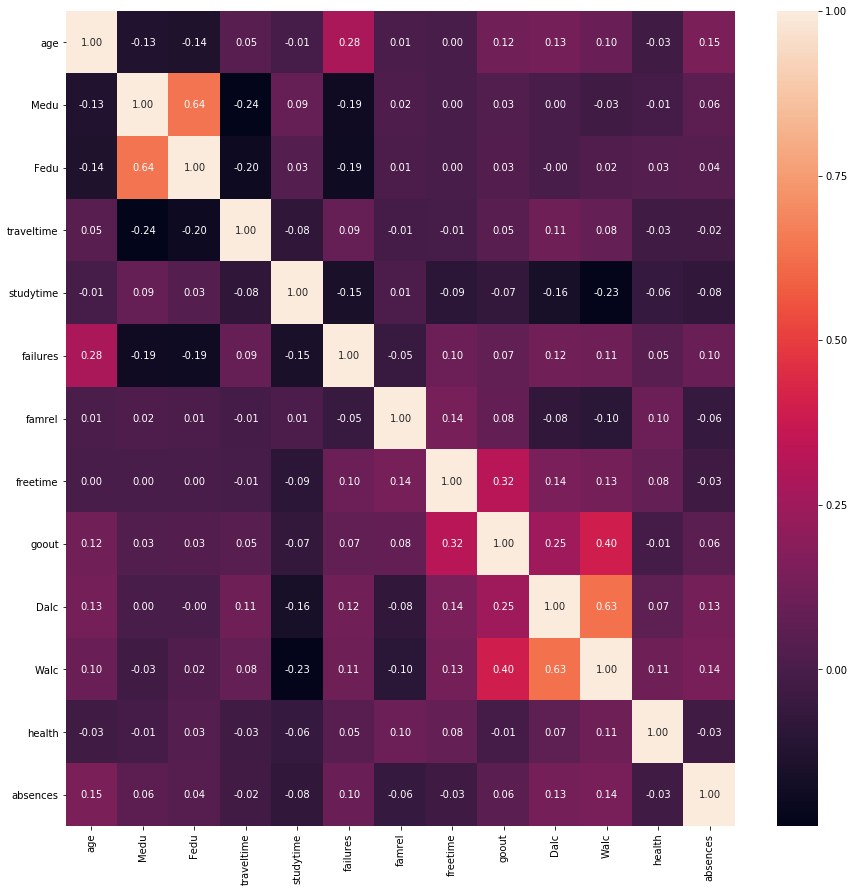

Total number of students: 1044
Number of features: 30
Number of students who passed: 814
Number of students who failed: 230
Shape of y:  (1044, 1)
Shape of X:  (1044, 56)
Training set has 783 samples.
Testing set has 261 samples.
F1 score of Logistic Regression on trainig set: 0.8931008339651251
F1 score of Logistic Regression on test set: 0.8693693693693694
F1 score of Support Vector Classifier on trainig set: 0.9002217294900221
F1 score of Support Vector Classifier on test set: 0.8801742919389979
F1 score of Navie Bayes on trainig set: 0.8630024610336342
F1 score of Navie Bayes on test set: 0.8321167883211679
F1 score of Decision tree on trainig set: 0.9975389663658737
F1 score of Decision tree on test set: 0.8060453400503778
F1 score of Random Forest on training set: 0.9975470155355683
F1 score of Random Forest on test set: 0.871559633027523


In [178]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
import matplotlib
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#Read csv files
d1 = pd.read_csv('./student-mat1.csv')
d2 = pd.read_csv("./student-por1.csv")

print(d1.head())
print(d2.head())

#Uncomment below two lines to take column G1 and G2
d2.drop(['G1','G2'],axis=1,inplace=True)
d1.drop(['G1','G2'],axis=1,inplace=True)

for i in range(len(d2)):
    if d2['G3'].iloc[i] > 9:  #If the grade is greater than 9 then the student is passed otherwise he/she is fail.
        d2['G3'].iloc[i] = "yes"
    else:
        d2['G3'].iloc[i] = "no"


for i in range(len(d1)):
    if d1['G3'].iloc[i] > 9:
        d1['G3'].iloc[i] = "yes"
    else:
        d1['G3'].iloc[i] = "no"

#Rename label column as passed
d1.rename(index=str,columns={'G3':'passed'},inplace=True)
d2.rename(index=str,columns={'G3':'passed'},inplace=True)

student_data = pd.concat([d1,d2]) # Merge d1 and d2 row wise
print(student_data.head())

print(student_data.info())
print(student_data.isnull().sum())


print(student_data['school'].value_counts())
print(student_data['age'].value_counts())


#Count histogram
columns=student_data.columns[:]
plt.subplots(figsize=(18,55))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    student_data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

#Relation of each column with every other column (Pairwise Plot)
sns.pairplot(data=student_data,hue='passed',diag_kind='kde')
plt.show()
df_small = student_data[[
               'passed',
               'Dalc',
               'goout',
               'Medu',
               'Fedu','failures','Walc']]
sns.pairplot(df_small)


# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(student_data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

#Relation between Workday Alcohol Consumption and final result
matplotlib.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Dalc',y='passed',hue='sex', data=student_data,dodge=True)
ax.set_xlabel("Workday Alcohol Consumption", fontsize=24, labelpad = 40)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.show()

#Relation between Weekend Alcohol Consumption and final result
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Walc',y='passed',hue='sex', data=student_data,dodge=True)
ax.set_xlabel("Weekend Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()



# Analysis
#Calculate number of students
n_students = len(student_data.index)
# Calculate number of features, excluding the label column
n_features = len(student_data.columns) - 1
# Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])
# Calculate failing students.
n_failed = len(student_data[student_data['passed'] == 'no'])
# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[student_data.columns[:-1]]
y_all = student_data[student_data.columns[-1]]

obj_df = student_data.select_dtypes(include=['object']).copy() # Make dataframe consists of only object
obj_df.drop(['passed'],axis=1,inplace=True)
#Label encoding
lb = LabelEncoder()
for i in obj_df.columns:
    obj_df[i] = lb.fit_transform(obj_df[i])

flt_df = student_data.select_dtypes(include=['int','float']).copy() #Make dataframe consists of int and float value
#One Hot encoding
on = OneHotEncoder()
obj_df = on.fit_transform(obj_df).toarray()
flt_arr = np.array(flt_df) #Convert df to array

lb = LabelEncoder() # Label encoding on label
student_data['passed'] = lb.fit_transform(student_data['passed'])

X = np.concatenate((flt_arr,obj_df),axis=1)
y = np.array([student_data['passed']]).T
print("Shape of y: ",y.shape)
print("Shape of X: ",X.shape)



# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2,stratify=y_all)
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

#Logistic Regression
lr = LogisticRegression().fit(X_train,y_train)
y_pred = lr.predict(X_train)
print("F1 score of Logistic Regression on trainig set: {}".format(f1_score(y_train, y_pred, pos_label=1))) #F1 score of training set
y_pred = lr.predict(X_test)
print("F1 score of Logistic Regression on test set: {}".format(f1_score(y_test, y_pred, pos_label=1))) #F1 score of test set

# Support Vector classifier
sv = SVC().fit(X_train,y_train)
y_pred = sv.predict(X_train)
print("F1 score of Support Vector Classifier on trainig set: {}".format(f1_score(y_train, y_pred, pos_label=1))) #F1 score of training set
y_pred = sv.predict(X_test)
print("F1 score of Support Vector Classifier on test set: {}".format(f1_score(y_test, y_pred, pos_label=1))) #F1 score of test set

#Navie Bayes
gb = GaussianNB().fit(X_train,y_train)
y_pred = gb.predict(X_train)
print("F1 score of Navie Bayes on trainig set: {}".format(f1_score(y_train, y_pred, pos_label=1))) #F1 score of training set
y_pred = gb.predict(X_test)
print("F1 score of Navie Bayes on test set: {}".format(f1_score(y_test, y_pred, pos_label=1))) #F1 score of test set

# Decision Tree Classifier
dt = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dt.predict(X_train) # F1 score of trainig set
print("F1 score of Decision tree on trainig set: {}".format(f1_score(y_train, y_pred, pos_label=1)))
y_pred = dt.predict(X_test) # F1 score of test set
print("F1 score of Decision tree on test set: {}".format(f1_score(y_test, y_pred, pos_label=1)))

#Random Forest Classifier
rm = RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
y_pred = rm.predict(X_train)
print("F1 score of Random Forest on training set: {}".format(f1_score(y_train, y_pred, pos_label=1))) # F1 score of trainig set
y_pred = rm.predict(X_test)
print("F1 score of Random Forest on test set: {}".format(f1_score(y_test, y_pred, pos_label=1))) # F1 score of test set


In [247]:
A=np.concatenate((X_test,y_test),axis = 1)
xtest = pd.DataFrame(data=A)



In [248]:
len(xtest)

261

In [250]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,16.0,4.0,3.0,1.0,1.0,0.0,3.0,1.0,3.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,17.0,1.0,1.0,3.0,2.0,0.0,5.0,1.0,3.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,18.0,3.0,3.0,1.0,4.0,0.0,5.0,3.0,3.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,16.0,2.0,1.0,2.0,2.0,0.0,4.0,2.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,5.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [251]:
xtest.to_csv('test.csv',index=False)

In [293]:
df = pd.read_csv('test.csv')

In [294]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,16.0,4.0,3.0,1.0,1.0,0.0,3.0,1.0,3.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,17.0,1.0,1.0,3.0,2.0,0.0,5.0,1.0,3.0,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,18.0,3.0,3.0,1.0,4.0,0.0,5.0,3.0,3.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,16.0,2.0,1.0,2.0,2.0,0.0,4.0,2.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,5.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
